<a href="https://colab.research.google.com/github/imprincesarraf/face-detection-face-recognition-and-emotion-detection/blob/main/speech_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Modules**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (4)'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        print(filename)
        break

YAF_chalk_fear.wav
YAF_calm_ps.wav
OAF_back_ps.wav
OAF_boat_sad.wav
YAF_cab_disgust.wav
YAF_boat_angry.wav
YAF_chair_sad.wav
YAF_burn_fear.wav
YAF_dead_happy.wav
YAF_bite_ps.wav
YAF_book_neutral.wav
YAF_hall_sad.wav
OAF_base_neutral.wav
OAF_bean_ps.wav
YAF_cab_angry.wav
YAF_choice_disgust.wav
OAF_bought_sad.wav
OAF_book_angry.wav
OAF_base_disgust.wav
OAF_back_happy.wav
OAF_back_fear.wav
YAF_chair_happy.wav
YAF_fit_neutral.wav
OAF_beg_neutral.wav
OAF_fall_fear.wav
OAF_dog_happy.wav
OAF_date_angry.wav
OAF_haze_disgust.wav


In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (4)'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        #split on the based on "_" and get the last path
        label = filename.split('_')[-1]
        print(label)
        break


fear.wav
ps.wav
ps.wav
sad.wav
disgust.wav
angry.wav
sad.wav
fear.wav
happy.wav
ps.wav
neutral.wav
sad.wav
neutral.wav
ps.wav
angry.wav
disgust.wav
sad.wav
angry.wav
disgust.wav
happy.wav
fear.wav
happy.wav
neutral.wav
neutral.wav
fear.wav
happy.wav
angry.wav
disgust.wav


In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (4)'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        #split on the based on "_" and get the last path
        label = filename.split('_')[-1]
        #again split to get the emotion alone
        label = label.split('.')[0]
        labels.append(label.lower())
        print(label)
        break


fear
ps
ps
sad
disgust
angry
sad
fear
happy
ps
neutral
sad
neutral
ps
angry
disgust
sad
angry
disgust
happy
fear
happy
neutral
neutral
fear
happy
angry
disgust


In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (4)'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [ ]:
paths[:5]

['/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/YAF_fear/YAF_chalk_fear.wav',
 '/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/YAF_fear/YAF_base_fear.wav',
 '/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/YAF_fear/YAF_chief_fear.wav',
 '/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/YAF_fear/YAF_beg_fear.wav',
 '/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/YAF_fear/YAF_chain_fear.wav']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()


,speech,label
0,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
1,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
2,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
3,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
4,/content/drive/MyDrive/archive (4)/TESS Toront...,fear


In [ ]:
df['label'].value_counts()

ps         800
sad        600
fear       400
neutral    400
disgust    200
angry      200
happy      200
Name: label, dtype: int64

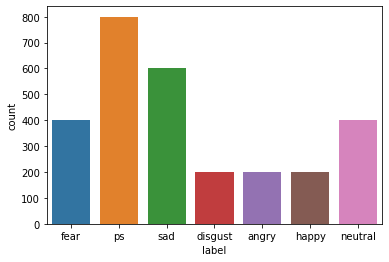

In [ ]:
 sns.countplot(df['label'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   speech  2800 non-null   object
 1   label   2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


In [ ]:
df['label'].value_counts()

ps         800
sad        600
fear       400
neutral    400
disgust    200
angry      200
happy      200
Name: label, dtype: int64

In [ ]:
print(df.columns.tolist())

['speech', 'label']


In [ ]:
X=df[df.label != 'ps']
y=df['label']


In [ ]:
X

,speech,label
0,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
1,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
2,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
3,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
4,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
...,...,...
2595,/content/drive/MyDrive/archive (4)/TESS Toront...,neutral
2596,/content/drive/MyDrive/archive (4)/TESS Toront...,neutral
2597,/content/drive/MyDrive/archive (4)/TESS Toront...,neutral
2598,/content/drive/MyDrive/archive (4)/TESS Toront...,neutral


In [ ]:
y

0          fear
1          fear
2          fear
3          fear
4          fear
         ...   
2595    neutral
2596    neutral
2597    neutral
2598    neutral
2599    neutral
Name: label, Length: 2000, dtype: object

0          fear
1          fear
2          fear
3          fear
4          fear
         ...   
2595    neutral
2596    neutral
2597    neutral
2598    neutral
2599    neutral
Name: label, Length: 2000, dtype: object

In [ ]:
#Splitting the datset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:

#Handling imbalanced Dataset
from imblearn.datasets import make_imbalance
X1,y1= make_imbalance(X_train,y_train,sampling_strategy={'fear': 100, 'sad': 100, 'disgust': 100,'angry':100,'happy':100,'neutral':100},random_state=14)


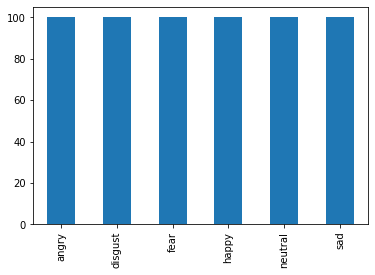

In [ ]:
y1.value_counts().plot(kind='bar')

In [ ]:
X1['label'].value_counts()

angry      100
disgust    100
fear       100
happy      100
neutral    100
sad        100
Name: label, dtype: int64

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

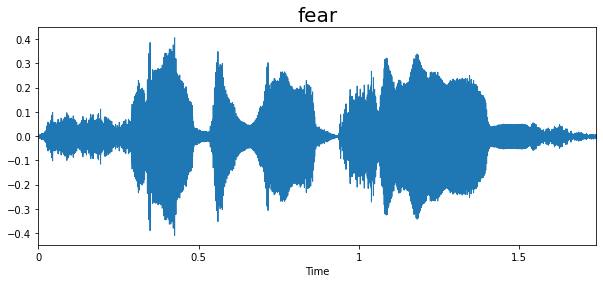

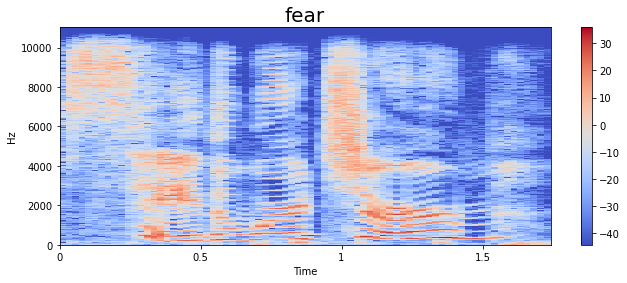

In [ ]:
emotion = 'fear'
path = np.array(X1['speech'][X1['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

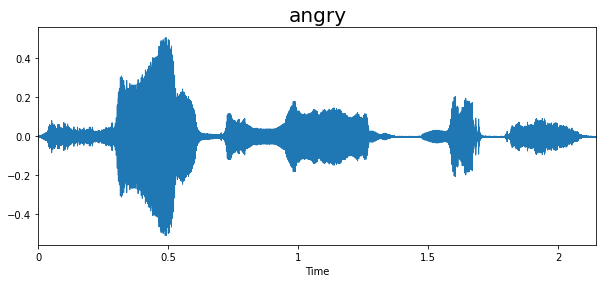

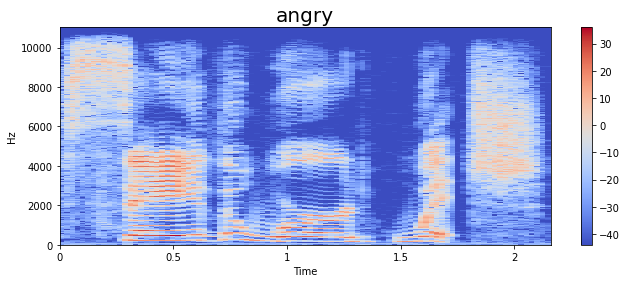

In [ ]:
emotion = 'angry'
path = np.array(X1['speech'][X1['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

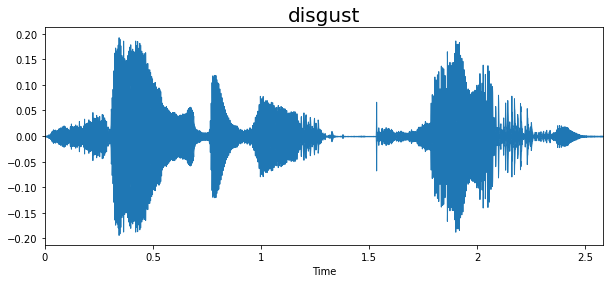

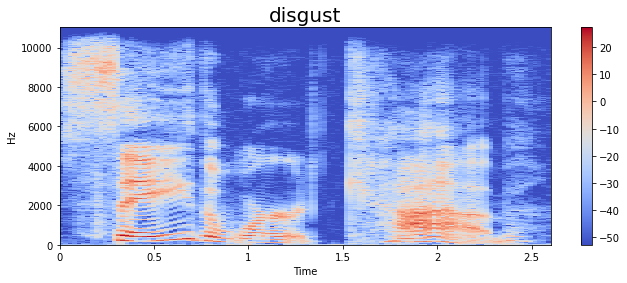

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

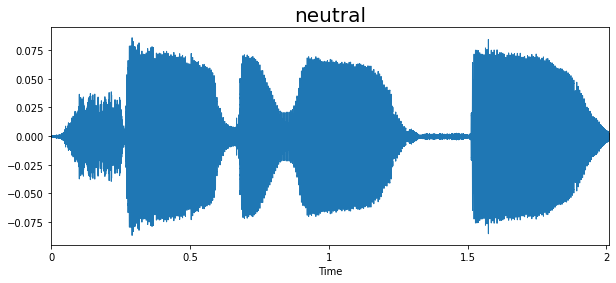

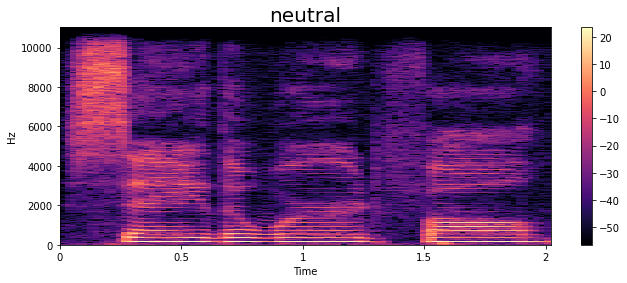

In [ ]:
emotion = 'neutral'
path = np.array(X1['speech'][X1['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

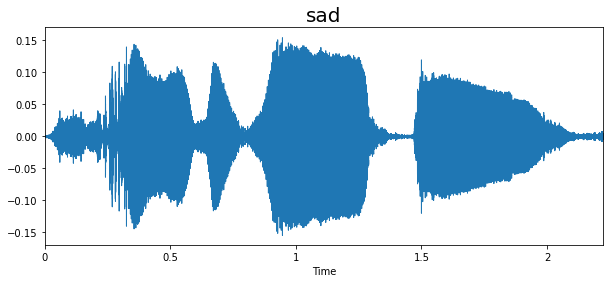

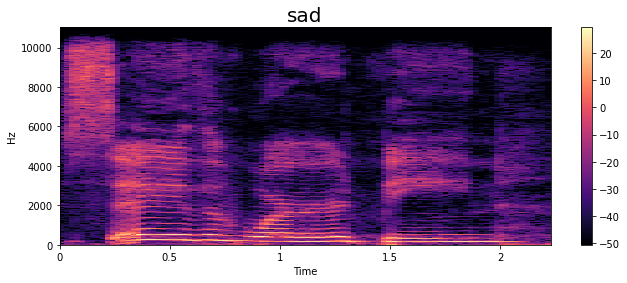

In [ ]:
emotion = 'sad'
path = np.array(X1['speech'][X1['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

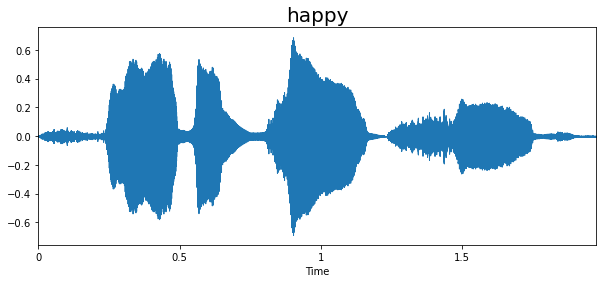

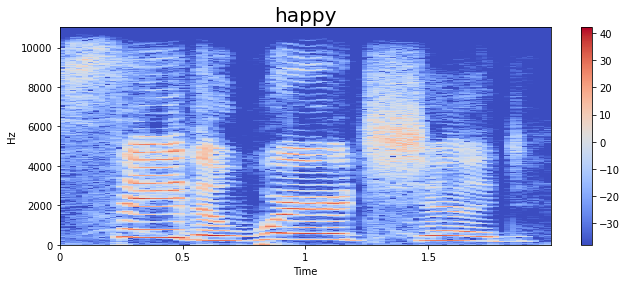

In [ ]:
emotion = 'happy'
path = np.array(X1['speech'][X1['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Feature Extraction**

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(X1['speech'][0])

array([-3.5225879e+02,  6.8826447e+01, -8.9721289e+00,  4.5612350e+00,
       -2.5012659e+01,  3.6730793e+00, -3.8474770e+00, -2.1898499e+01,
       -7.0673461e+00, -3.3582172e+00, -2.1675364e+01,  1.1468852e+01,
       -1.6558340e+01,  1.0254200e+01, -3.2224183e+00, -6.3382607e+00,
       -5.9273815e-01,  1.8460358e+00, -9.3557863e+00,  4.8794971e+00,
       -4.3076406e+00,  4.4647064e+00, -7.6235642e+00, -1.0393220e+00,
       -3.4667680e+00, -1.3792150e+00,  3.8000323e-02,  5.8680253e+00,
        1.7756927e+00,  1.1680832e+01,  8.8765745e+00,  1.4571449e+01,
        1.0297598e+01,  8.8249731e+00,  1.2217995e+00,  3.6977003e+00,
        7.6452118e-01,  5.7928190e+00,  6.6934328e+00,  7.3669329e+00],
      dtype=float32)

In [ ]:
#Mel-Frequency Cepstral Coefficients
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-209.9055, 33.13839, -29.01162, 11.713843, -2...
1       [-335.29004, 36.445766, -14.592222, 15.612029,...
2       [-321.08243, 30.770987, -10.949012, 31.180315,...
3       [-339.4985, 60.38711, -29.574816, 20.3983, 0.3...
4       [-327.47775, 26.309711, -18.654455, 40.59416, ...
                              ...                        
2595    [-516.2446, 116.38968, 18.30375, -9.509237, 5....
2596    [-502.21332, 109.71678, 18.131165, -3.5156403,...
2597    [-529.89, 104.244, 21.894669, -3.1903756, 16.4...
2598    [-523.32666, 97.87772, 23.963326, -7.1325874, ...
2599    [-551.5267, 128.74512, 27.320269, -10.273017, ...
Name: speech, Length: 2000, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2000, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape


(2000, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2000, 6)

In [ ]:
##Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50


ValueError: ignored

**REFERENCES**
-https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0